<a href="https://colab.research.google.com/github/krishna2542004/INTERN25/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data"
colnames = ['Class','age','menopause','tumor_size','inv_nodes','node_caps','deg_malig','breast','breast_quad','irradiat']
df = pd.read_csv(data_url, header=None, names=colnames, na_values='?')
df.head()


,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [2]:
import warnings
warnings.filterwarnings('ignore')
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())

for c in df.columns:
    if df[c].dtype=='object' and df[c].isnull().any():
        df[c] = df[c].fillna(df[c].mode()[0])

df['Class'] = df['Class'].map({'no-recurrence-events':0,'recurrence-events':1})
df['Class'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor_size   286 non-null    object
 4   inv_nodes    286 non-null    object
 5   node_caps    278 non-null    object
 6   deg_malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast_quad  285 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
None
                       Class    age menopause tumor_size inv_nodes node_caps  \
count                    286    286       286        286       286       278   
unique                     2      6         3         11         7         2   
top     no-recurrence-events  50-59   premeno      30-34       0-2        no   
freq                     20

,count
Class,
0,201
1,85


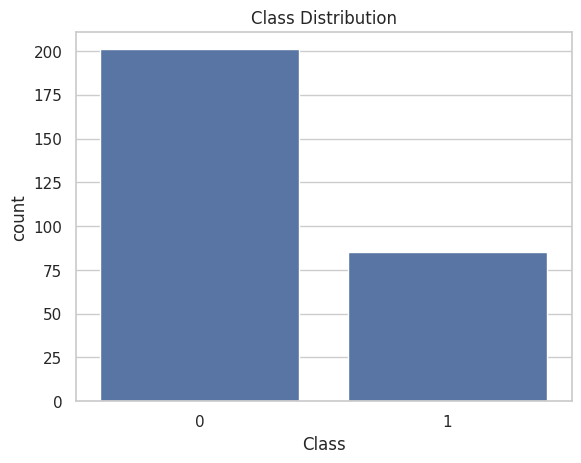

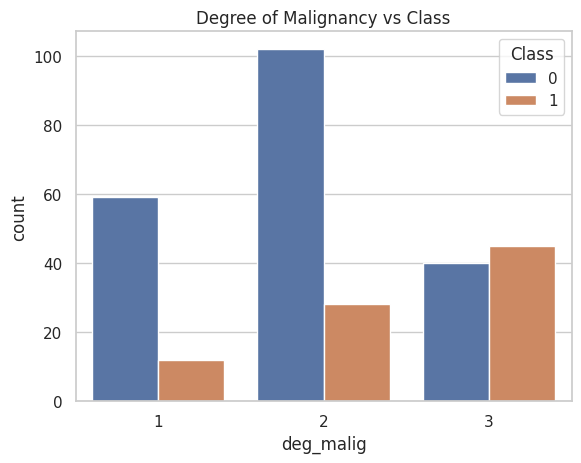

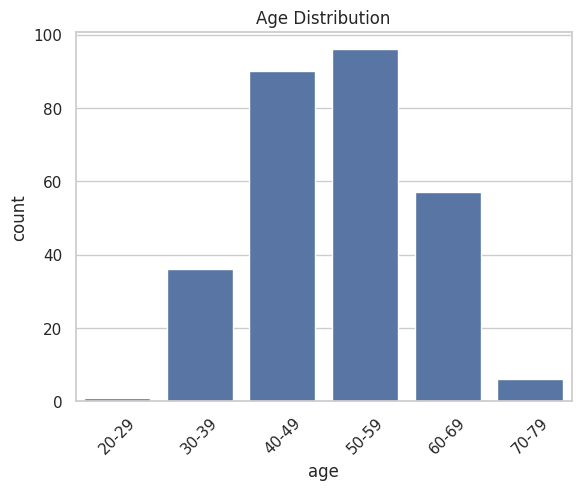

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

sns.countplot(x='deg_malig', hue='Class', data=df)
plt.title('Degree of Malignancy vs Class')
plt.show()

sns.countplot(x='age', data=df, order=sorted(df['age'].unique()))
plt.xticks(rotation=45)
plt.title('Age Distribution')
plt.show()


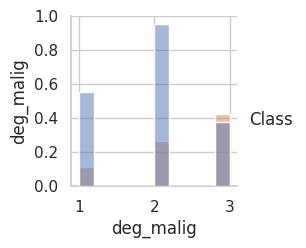

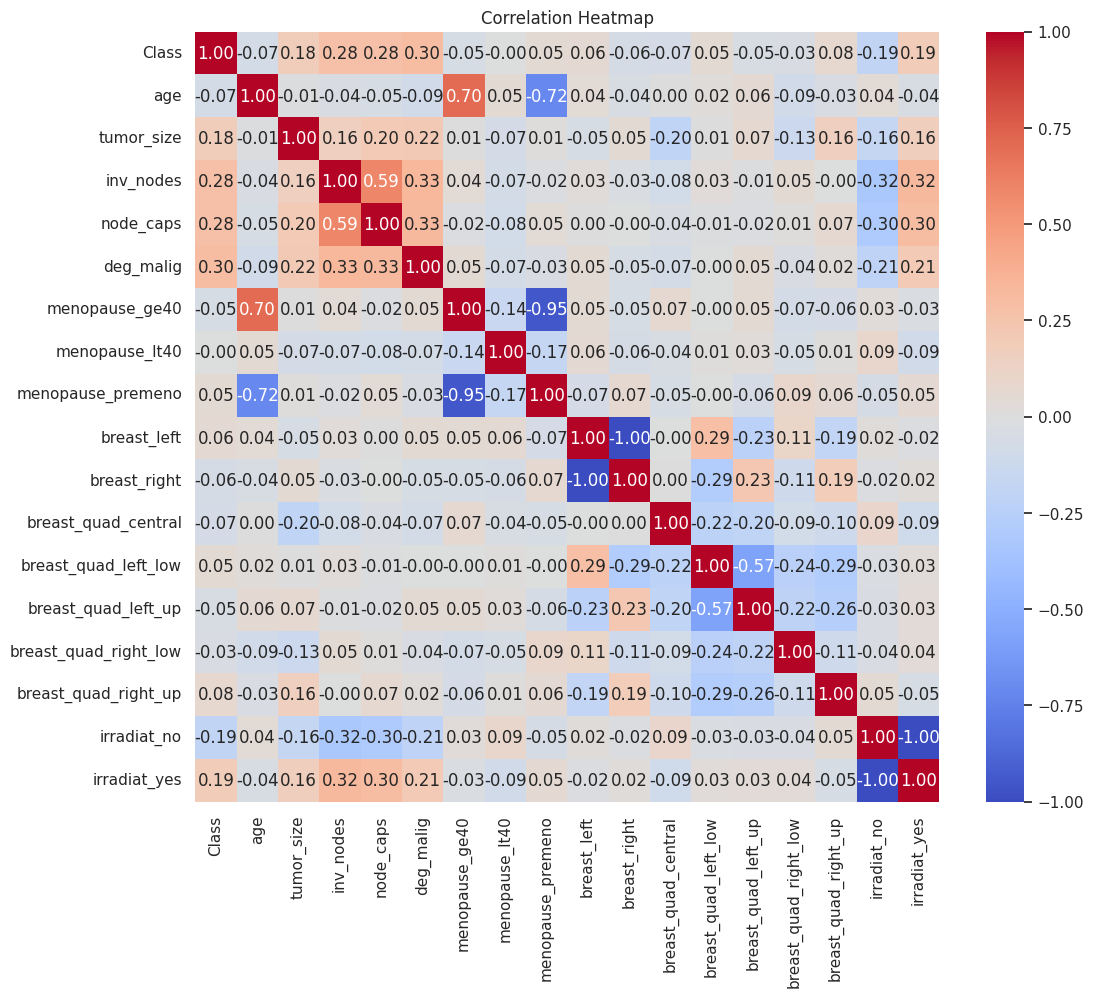

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sample_cols = ['deg_malig', 'tumor_size', 'inv_nodes', 'Class']
sns.pairplot(df[sample_cols], hue='Class', diag_kind='hist')
plt.show()

def range_to_midpoint(range_str):
    if isinstance(range_str, str):
        if '-' in range_str:
            low, high = map(int, range_str.split('-'))
            return (low + high) / 2
        elif range_str.isdigit():
            return int(range_str)
    return np.nan

df_numeric = df.copy()
for col in ['age', 'tumor_size', 'inv_nodes']:
    df_numeric[col] = df_numeric[col].apply(range_to_midpoint)

df_numeric['node_caps'] = df_numeric['node_caps'].map({'no': 0, 'yes': 1})
df_numeric = pd.get_dummies(df_numeric, columns=['menopause', 'breast', 'breast_quad', 'irradiat'])

plt.figure(figsize=(12,10))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Class', axis=1)
y = df['Class']
X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X[['deg_malig']] = scaler.fit_transform(X[['deg_malig']])
X.head()


,deg_malig,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor_size_10-14,tumor_size_15-19,...,inv_nodes_3-5,inv_nodes_6-8,inv_nodes_9-11,node_caps_yes,breast_right,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up,irradiat_yes
0,1.290564,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,-0.066426,False,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,-0.066426,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,-0.066426,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False
4,-0.066426,False,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(X_train.shape, X_test.shape)

(228, 31) (58, 31)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


Logistic Regression trained successfully.
Random Forest trained successfully.
SVM trained successfully.


In [17]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    results.append({'Model': name, 'Accuracy': acc})

results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
print(results_df)



Logistic Regression
Accuracy: 0.7241379310344828
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        41
           1       0.55      0.35      0.43        17

    accuracy                           0.72        58
   macro avg       0.66      0.62      0.62        58
weighted avg       0.70      0.72      0.70        58


Random Forest
Accuracy: 0.7413793103448276
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.58      0.41      0.48        17

    accuracy                           0.74        58
   macro avg       0.68      0.64      0.66        58
weighted avg       0.72      0.74      0.73        58


SVM
Accuracy: 0.7758620689655172
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        41
           1       0.70      0.41      0.52        17

    accuracy                           0.78        58


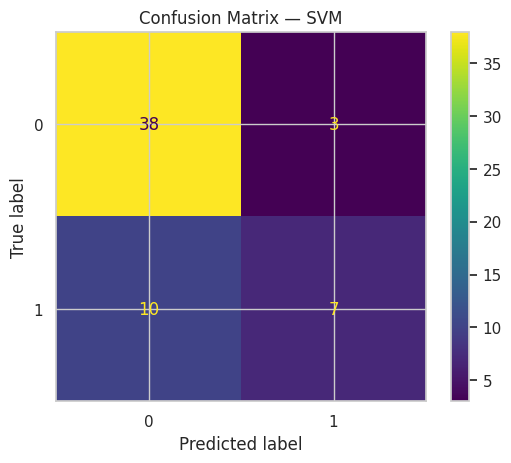

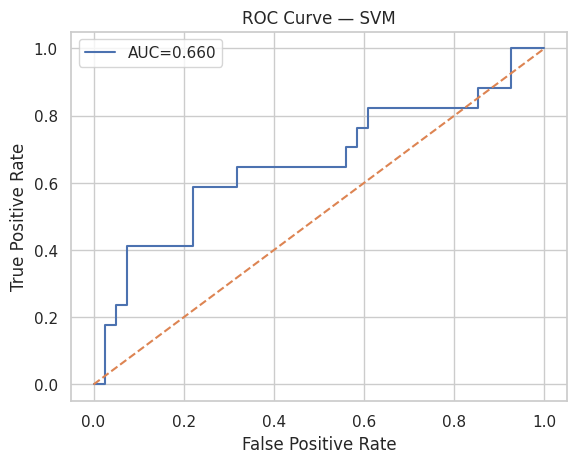

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve, ConfusionMatrixDisplay
best_name = results_df.iloc[0]['Model']
best_model = models[best_name]

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title(f'Confusion Matrix — {best_name}')
plt.show()

if hasattr(best_model, 'predict_proba'):
    y_prob = best_model.predict_proba(X_test)[:,1]
else:
    y_prob = best_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve — {best_name}')
plt.legend()
plt.show()


In [19]:
import joblib
joblib.dump(best_model, 'best_breast_cancer_model.pkl')
print(f"Saved best model: {best_name}")


Saved best model: SVM
